In [ ]:
import os
os.chdir('drive/My Drive/MLProject_20202')

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, f1_score, classification_report
import pickle

In [ ]:
# MODEL = 'LSTM'
# MODEL = 'BiLSTM'
# MODEL = 'DM'
MODEL = 'DBOW'

In [ ]:
df_train = pd.read_csv(f'Data/Train data/data_{MODEL}.csv')
df_val = pd.read_csv(f'Data/Val data/data_{MODEL}.csv')
df_test = pd.read_csv(f'Data/Test data/data_{MODEL}.csv')

In [ ]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1:]

X_val = df_val.iloc[:, :-1]
y_val = df_val.iloc[:, -1:]

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1:]

In [ ]:
X_train_cross = pd.concat([X_train, X_val])
y_train_cross = pd.concat([y_train, y_val])

In [ ]:
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train_cross, y_train_cross, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="roc_auc")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "ROC AUC"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

100%|██████████| 4/4 [14:50<00:00, 222.67s/it]


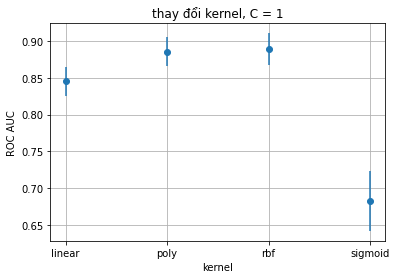

In [ ]:
title = "thay đổi kernel, C = 1"
xlabel = "kernel"
X_axis = []
Y_axis = []
error = []
mean_max = 0
svm_kernel = ""

for kernel in tqdm(['linear', 'poly', 'rbf', 'sigmoid']):
    # Với mỗi kernel được chọn, 
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = SVC(kernel=kernel, C=1.0, class_weight='balanced')
    mean, std = cross_validation(text_clf)
    X_axis.append(kernel)
    Y_axis.append(mean)
    error.append(std)
    if (mean_max <= mean):
        mean_max = mean
        svm_kernel = kernel

# lưu kết quả ra file ảnh 
plot(title, xlabel, X_axis, Y_axis, error)
plt.savefig(f'Image/LSTM/svm_change_kernel_{MODEL}.png', bbox_inches='tight')
plt.show()

100%|██████████| 5/5 [19:23<00:00, 232.72s/it]


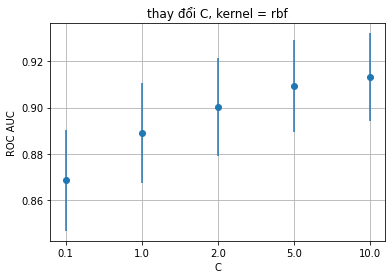

In [ ]:
title = "thay đổi C, kernel = " + str(svm_kernel)
xlabel = "C"
X_axis = []
Y_axis = []
error = []
mean_max = 0.0
svm_C = 0.0

for C in tqdm([.1, 1.0, 2.0, 5.0, 10.0]):
    # Với từng giá trị C nhận được, 
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = SVC(kernel=svm_kernel, C=C, class_weight='balanced')
    mean, std = cross_validation(text_clf)
    X_axis.append(str(C))
    Y_axis.append(mean)
    error.append(std)
    if (mean_max <= mean):
        mean_max = mean
        svm_C = C

# lưu kết quả ra file ảnh
plot(title, xlabel, X_axis, Y_axis, error)
plt.savefig(f'Image/LSTM/svm_change_C_{MODEL}.png', bbox_inches='tight')
plt.show()

100%|██████████| 2/2 [01:28<00:00, 44.38s/it]


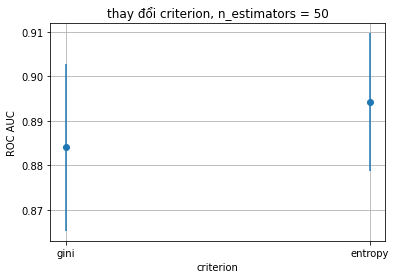

In [ ]:
title = "thay đổi criterion, n_estimators = 50"
xlabel = "criterion"
X_axis = []
Y_axis = []
error = []
mean_max = 0.0
rf_criterion = ""

for criterion in tqdm(["gini", "entropy"]):
    # Với mỗi criterion nhận được,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = RandomForestClassifier(criterion=criterion, n_estimators=50, class_weight='balanced')
    mean, std = cross_validation(text_clf)
    X_axis.append(str(criterion))
    Y_axis.append(mean)
    error.append(std)
    if (mean_max <= mean):
        mean_max = mean
        rf_criterion = criterion

# lưu kết quả ra file ảnh
plot(title, xlabel, X_axis, Y_axis, error)
plt.savefig(f'Image/LSTM/RF_change_criterion_{MODEL}.png', bbox_inches='tight')
plt.show()

100%|██████████| 4/4 [08:29<00:00, 127.47s/it]


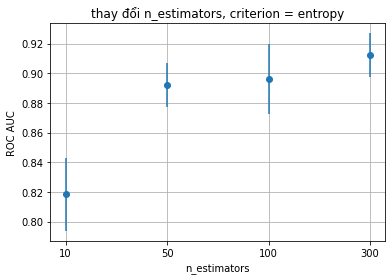

In [ ]:
title = "thay đổi n_estimators, criterion = " + str(rf_criterion)
xlabel = "n_estimators"
X_axis = []
Y_axis = []
error = []
mean_max = 0.0
rf_estimators = 0.0

for n_estimators in tqdm([10, 50, 100, 300]):
    # Với từng giá trị n_estimators nhận được,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = RandomForestClassifier(criterion=rf_criterion, n_estimators=n_estimators, class_weight='balanced')
    mean, std = cross_validation(text_clf)
    X_axis.append(str(n_estimators))
    Y_axis.append(mean)
    error.append(std)
    if (mean_max <= mean):
        mean_max = mean
        rf_estimators = n_estimators

# lưu kết quả ra file ảnh
plot(title, xlabel, X_axis, Y_axis, error)
plt.savefig(f'Image/LSTM/RF_change_N_{MODEL}.png', bbox_inches='tight')
plt.show()

100%|██████████| 5/5 [02:07<00:00, 25.57s/it]


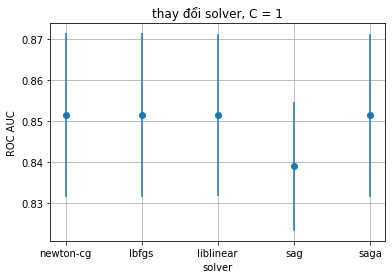

In [ ]:
title = "thay đổi solver, C = 1"
xlabel = "solver"
X_axis = []
Y_axis = []
error = []
mean_max = 0.0
lr_solver = ""

for solver in tqdm(["newton-cg", "lbfgs", "liblinear", "sag", "saga"]):
    # Với mỗi criterion nhận được,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = LogisticRegression(solver=solver, C=1, class_weight='balanced', max_iter=400)
    mean, std = cross_validation(text_clf)
    X_axis.append(str(solver))
    Y_axis.append(mean)
    error.append(std)
    if (mean_max <= mean):
        mean_max = mean
        lr_solver = solver

# lưu kết quả ra file ảnh
plot(title, xlabel, X_axis, Y_axis, error)
plt.savefig(f'Image/LSTM/Logistic_change_solver_{MODEL}.png', bbox_inches='tight')
plt.show()

100%|██████████| 5/5 [00:48<00:00,  9.64s/it]


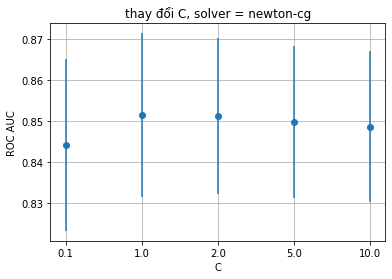

In [ ]:
title = "thay đổi C, solver = " + str(lr_solver)
xlabel = "C"
X_axis = []
Y_axis = []
error = []
mean_max = 0.0
lr_C = 0.0


for C in tqdm([.1, 1.0, 2.0, 5.0, 10.0]):
    # Với từng giá trị C nhận được, 
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = LogisticRegression(solver=lr_solver, C=C, class_weight='balanced', max_iter=400)
    mean, std = cross_validation(text_clf)
    X_axis.append(str(C))
    Y_axis.append(mean)
    error.append(std)
    if (mean_max <= mean):
        mean_max = mean
        lr_C = C

# lưu kết quả ra file ảnh
plot(title, xlabel, X_axis, Y_axis, error)
plt.savefig(f'Image/LSTM/Logistic_change_C_{MODEL}.png', bbox_inches='tight')
plt.show()

In [ ]:
svm_ = SVC(kernel=svm_kernel, C=svm_C, class_weight='balanced')
rf = RandomForestClassifier(criterion=rf_criterion, n_estimators=rf_estimators, class_weight='balanced')
logistic = LogisticRegression(solver=lr_solver, C=lr_C, class_weight='balanced', max_iter=400)

# Huấn luyện các mô hình trên tập dữ liệu train đầy đủ
svm_.fit(X_train, y_train)
rf.fit(X_train, y_train)
logistic.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=400, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
df_cat = pd.read_csv('Data/data_all_categorical.csv', encoding='utf-8')
y = df_cat.fraudulent

In [ ]:
# number of negative/positive class in dataser
neg = sum(y==0)
pos = sum(y==1)
print(f'{neg} {pos}')

17014 866


In [ ]:
param_init = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "max_depth": 4, # default: 3 only for depthwise
    "n_estimators": 1000, # default: 500
    "learning_rate": 0.025, # default: 0.05
    "subsample": 0.7,
    "colsample_bytree": 0.6,  # default:  1.0
    "colsample_bylevel": 0.5, # default: 1.0
    "random_state": 0,
    "scale_pos_weight": neg/pos,
 
    #
    "silent": True,
    "n_jobs": 16, 
 
    #
    "tree_method": "hist", # default: auto
    "grow_policy": "lossguide", # default depthwise
}
 
param_fit = {
    "eval_metric": ["rmse", "logloss", "auc", "aucpr"],
    "early_stopping_rounds": 500, # default: 100
    "verbose": 200,
    "eval_set": [(X_train, y_train), (X_val, y_val), (X_test, y_test)]
}
 
xgb_model = xgb.XGBClassifier(**param_init)
xgb_model.fit(X_train, y_train, **param_fit)
evals_result = xgb_model.evals_result()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-rmse:0.494656	validation_0-logloss:0.682511	validation_0-auc:0.848916	validation_0-aucpr:0.232665	validation_1-rmse:0.495026	validation_1-logloss:0.683249	validation_1-auc:0.743925	validation_1-aucpr:0.16387	validation_2-rmse:0.494808	validation_2-logloss:0.682817	validation_2-auc:0.78121	validation_2-aucpr:0.178403
Multiple eval metrics have been passed: 'validation_2-aucpr' will be used for early stopping.

Will train until validation_2-aucpr hasn't improved in 500 rounds.
[200]	validation_0-rmse:0.293282	validation_0-logloss:0.295297	validation_0-auc:0.967779	validation_0-aucpr:0.665103	validation_1-rmse:0.314896	validation_1-logloss:0.327872	validation_1-auc:0.896305	validation_1-aucpr:0.409283	validation_2-rmse:0.303275	validation_2-logloss:0.311348	validation_2-auc:0.877724	validation_2-aucpr:0.395435
[400]	validation_0-rmse:0.244218	validation_0-logloss:0.213108	validation_0-auc:0.988457	validation_0-aucpr:0.836978	validation_1-rmse:0.280221	validation_1-logloss

In [ ]:
# store models
if MODEL in ['LSTM', 'BiLSTM']:
    for clf, clf_dict in zip([svm_, rf, logistic, xgb_model], ['svm', 'rf', 'logistic', 'xgboost']):
        with open(f'Model/LSTM/Classification/{MODEL}_{clf_dict}.pkl', 'wb') as file:
            pickle.dump(clf, file)
else:
    for clf, clf_dict in zip([svm_, rf, logistic, xgb_model], ['svm', 'rf', 'logistic', 'xgboost']):
        with open(f'Model/Doc2Vec/Classification/{MODEL}_{clf_dict}.pkl', 'wb') as file:
            pickle.dump(clf, file)